# Rotate Channels

In [1]:
import glob, os
from obspy import read, Stream
import matplotlib.pyplot as plt
%matplotlib notebook 

### Get list of the folders

In [2]:
cwd = os.getcwd()

In [3]:
dirs = [ name for name in os.listdir(os.getcwd()) if os.path.isdir(os.path.join(os.getcwd(), name)) ]

### Remove unnecessary folder

In [4]:
dirs.remove('.ipynb_checkpoints')

### Get the list of the files inside in a folder

In [5]:
sacs = glob.glob(dirs[1] + '/*.SAC')

## Read all sac files 

In [6]:
st_org = Stream()
for sac in sacs:
    st_org += read(sac,format='SAC')

# To make the rotation, stations should have azimuth and back azimuth angles which are related with the latitude and longitude of the station and the event!

#### Delete Z components since it is not necessary for this process

In [7]:
for tr in st_org.select(component="Z"):
    st_org.remove(tr) 

## Rotate North and East components to Radial and Transverse Components

In order to make the rotation, channels should have the same length

### Trim the data to make sure that they have same length

In [8]:
start = max(st_org[0].stats.starttime, st_org[1].stats.starttime)
end = min(st_org[0].stats.endtime, st_org[1].stats.endtime)
st_trimmed = st_org.copy()
st_trimmed.trim(start,end)

2 Trace(s) in Stream:
AT.SDPT..BHN | 2011-07-16T19:58:23.000000Z - 2011-07-16T20:04:23.000000Z | 50.0 Hz, 18001 samples
AT.SDPT..BHE | 2011-07-16T19:58:23.000000Z - 2011-07-16T20:04:23.000000Z | 50.0 Hz, 18001 samples

#### Add azimuth and inclination angles of the channels.
East component has azimuth and inclination of 90 degrees

North component has azimuth and inclination of 0 and 90 degrees, respectively

In [9]:
for tr in st_trimmed.select(component="E"):
    tr.stats.sac.cmpaz = int(90)
    tr.stats.sac.cmpinc = int(90)
for tr in st_trimmed.select(component="N"):
    tr.stats.sac.cmpaz = int(0)
    tr.stats.sac.cmpinc = int(90)

## Rotate the signal by using back azimuth angle

In [10]:
st_rotated = st_trimmed.copy()
st_rotated.rotate(method="NE->RT",back_azimuth = st_trimmed[0].stats.sac.baz)

2 Trace(s) in Stream:
AT.SDPT..BHR | 2011-07-16T19:58:23.000000Z - 2011-07-16T20:04:23.000000Z | 50.0 Hz, 18001 samples
AT.SDPT..BHT | 2011-07-16T19:58:23.000000Z - 2011-07-16T20:04:23.000000Z | 50.0 Hz, 18001 samples

<IPython.core.display.Javascript object>


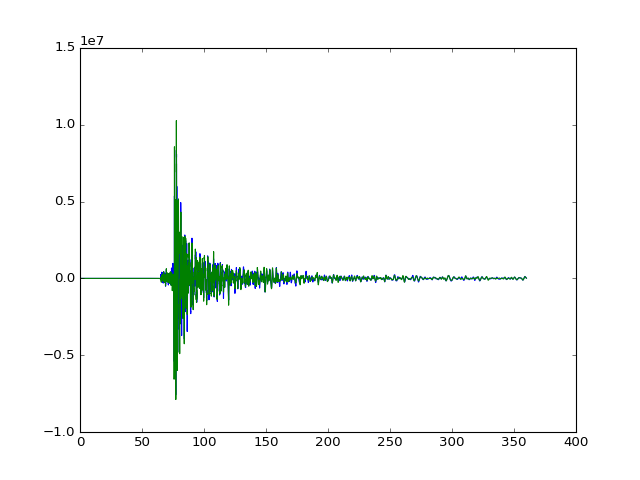

In [13]:
plt.plot(st_trimmed[0].times(),st_trimmed[0].data)
plt.plot(st_rotated[0].times(),st_rotated[0].data)

### Save the rotated signals

In [19]:
os.listdir(cwd)
if 'rotated' not in os.listdir(cwd):
    os.mkdir('rotated')

In [20]:
for tr in st_rotated: 
    tr.write(cwd + '/rotated/' + tr.id + '.SAC', format="SAC")

/home/dertuncay/Obspy_Tutorial
/home/dertuncay/Obspy_Tutorial
